OMDEDNA ALGERIA PROJECT

Team - 5

CONTRIBUTORS - ***Adeeba Rashid AND Abdelillah.***  
We were the only ***two active members*** who worked on this project.

***Adeeba*** - worked on data cleaning and performed exploratory data analysis.

***Abdelillah*** -  worked on training and testing side and model building.

Also, we worked together in video making where our whole project was explained in detail.

#Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore') 
import os 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

**read the file**
* keep weather_df later (contain humidity and temperature)
* deal with weather_norh_df (doesn't contain humidity)



In [ ]:
os.chdir("..")
################################################
weather_df = pd.read_csv('weatherHistory.csv') #    (2)
################################################

####################################################
weather_norh_df = pd.read_csv('weatherHistory.csv')#    (1)
####################################################


#predict temperature without humidity  ==> weather_norh_df file#




show the head of the csv

In [ ]:
weather_norh_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


show the columns

In [ ]:
weather_norh_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

**** delete humidity column***

In [ ]:
del weather_norh_df['Humidity']

verify the columns

In [ ]:
weather_norh_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
weather_norh_df.shape

(96453, 11)

In [ ]:
weather_norh_df.describe()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
weather_norh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


In [ ]:
weather_norh_df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
weather_norh_df.isnull().all()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
round(100*(weather_norh_df.isnull().sum()/len(weather_norh_df.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

In [ ]:
weather_norh_df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
weather_norh_df.loc[weather_norh_df['Precip Type'].isnull(),'Precip Type']='rain'

In [ ]:
round(100*(weather_norh_df.isnull().sum()/len(weather_norh_df.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

In [ ]:
weather_norh_df.loc[weather_norh_df['Precip Type']=='rain','Precip Type']=1
weather_norh_df.loc[weather_norh_df['Precip Type']=='snow','Precip Type']=0

In [ ]:
weather_norh_df_num=weather_norh_df[list(weather_norh_df.dtypes[weather_norh_df.dtypes!='object'].index)]

In [ ]:
weather_norh_y = weather_norh_df_num.pop('Temperature (C)')
weather_norh_x = weather_norh_df_num

In [ ]:
train_norh_x,test_norh_x,train_norh_y,test_norh_y = train_test_split(weather_norh_x,weather_norh_y,test_size = 0.2,random_state = 8)

In [ ]:
train_norh_x.head()

,Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
17317,16.994444,13.8621,239.0,11.2700,0.0,1011.19
1319,14.333333,16.4703,305.0,14.9569,0.0,1019.79
69699,13.283333,10.8353,337.0,16.1000,0.0,1021.82
58333,6.055556,9.6600,50.0,9.9820,0.0,1023.60
50041,15.166667,2.9141,336.0,8.4203,0.0,1021.51


**build the model**

In [ ]:
model = LinearRegression()
model.fit(train_norh_x,train_norh_y)

LinearRegression()

In [ ]:
prediction_norh = model.predict(test_norh_x)

In [ ]:
np.mean((prediction_norh-test_norh_y)**2)

0.9262377312297941

visualise the result 

In [ ]:
pd.DataFrame({'actuel':test_norh_y,
              'prediction':prediction_norh,
              'diff':(test_norh_y-prediction_norh)})

,actuel,prediction,diff
65024,16.083333,16.834027,-0.750694
70713,14.005556,14.142381,-0.136825
31953,6.127778,7.042273,-0.914495
63631,-1.222222,-1.670418,0.448196
63787,4.894444,4.388672,0.505773
...,...,...,...
66038,17.033333,17.118346,-0.085012
71919,9.950000,9.741516,0.208484
72362,-5.600000,-8.012447,2.412447
75118,12.688889,12.907359,-0.218470


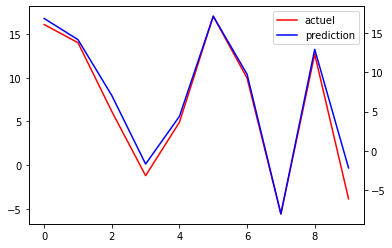

In [ ]:
actuel = [16.083333,14.005556,6.127778,-1.222222,4.894444,17.03333,9.950000,-5.600000,12.688889,-3.866667]
prediction = [16.834027,14.142381,7.042273,-1.670418,4.388672,17.118346,9.741516,-8.012447,12.907359,-2.158502]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()



---



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_norh = PolynomialFeatures(degree = 4)
x_poly_norh = poly_norh.fit_transform(train_norh_x)
poly_norh.fit(x_poly_norh, train_norh_y)
lin2_norh = LinearRegression()
lin2_norh.fit(x_poly_norh, train_norh_y)

LinearRegression()

In [ ]:
prediction2_norh = lin2_norh.predict(poly_norh.fit_transform(test_norh_x))
np.mean((prediction2_norh-test_norh_y)**2)

0.18437902311706086

In [ ]:
pd.DataFrame({'actuel':test_norh_y,
              'prediction':prediction2_norh,
              'diff':(test_norh_y-prediction2_norh)})

,actuel,prediction,diff
65024,16.083333,16.202136,-0.118803
70713,14.005556,14.108447,-0.102892
31953,6.127778,6.505154,-0.377376
63631,-1.222222,-1.525663,0.303441
63787,4.894444,4.599069,0.295375
...,...,...,...
66038,17.033333,17.029757,0.003576
71919,9.950000,9.477282,0.472718
72362,-5.600000,-5.819761,0.219761
75118,12.688889,12.663670,0.025219


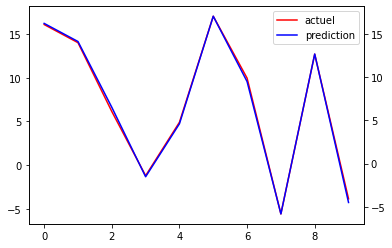

In [ ]:
actuel = [16.083333,14.005556,6.127778,-1.222222,4.894444,17.03333,9.950000,-5.600000,12.688889,-3.866667]
prediction = [16.202136,14.108447,6.505154,-1.525663,4.599069,17.029757,9.477282,-5.819761,12.663670,-4.497432]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_norh = DecisionTreeRegressor(random_state=0)
regressor_norh.fit(train_norh_x,train_norh_y)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction3_norh = regressor_norh.predict(test_norh_x)
np.mean((prediction3_norh-test_norh_y)**2)

0.11063317282862667

In [ ]:
pd.DataFrame({'actuel':test_norh_y,
              'prediction':prediction3_norh,
              'diff':(test_norh_y-prediction3_norh)})

,actuel,prediction,diff
65024,16.083333,16.083333,-1.065814e-14
70713,14.005556,14.005556,1.065814e-14
31953,6.127778,6.127778,-8.881784e-16
63631,-1.222222,-1.194444,-2.777778e-02
63787,4.894444,4.855556,3.888889e-02
...,...,...,...
66038,17.033333,17.033333,0.000000e+00
71919,9.950000,9.950000,0.000000e+00
72362,-5.600000,-4.994444,-6.055556e-01
75118,12.688889,12.688889,3.552714e-15


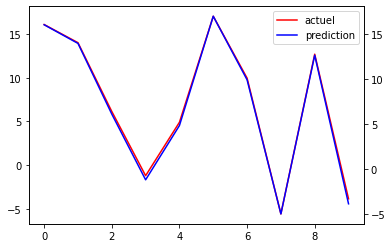

In [ ]:
actuel = [16.083333,14.005556,6.127778,-1.222222,4.894444,17.03333,9.950000,-5.600000,12.688889,-3.866667]
prediction = [16.083333,14.005556,6.127778,-1.194444,4.855556,17.033333,9.950000,-4.994444,12.688889,-3.866667]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr_norh = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=100)
regr_norh.fit(train_norh_x,train_norh_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
prediction4_norh = regr_norh.predict(test_norh_x)
np.mean((prediction4_norh-test_norh_y)**2)

0.058575526436954684

In [ ]:
pd.DataFrame({'actuel':test_norh_y,
              'prediction':prediction4_norh,
              'diff':(test_norh_y-prediction4_norh)})

,actuel,prediction,diff
65024,16.083333,16.086917,-0.003584
70713,14.005556,14.006847,-0.001292
31953,6.127778,6.118972,0.008806
63631,-1.222222,-1.176683,-0.045539
63787,4.894444,4.940333,-0.045888
...,...,...,...
66038,17.033333,17.019683,0.013651
71919,9.950000,9.913094,0.036906
72362,-5.600000,-5.563655,-0.036345
75118,12.688889,12.696467,-0.007578


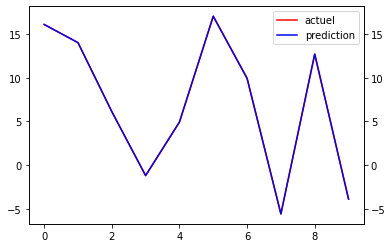

In [ ]:
actuel = [16.083333,14.005556,6.127778,-1.222222,4.894444,17.03333,9.950000,-5.600000,12.688889,-3.866667]
prediction = [16.086917,14.006847,6.118972,-1.176683,4.940333,17.019683,9.913094,-5.563655,12.696467,-3.881551]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

In [ ]:
regr2_norh = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=100)
regr2_norh.fit(train_norh_x,train_norh_y)

RandomForestRegressor(max_depth=50, random_state=0)

In [ ]:
prediction5_norh = regr2_norh.predict(test_norh_x)
np.mean((prediction5_norh-test_norh_y)**2)

0.051990431588068715

In [ ]:
pd.DataFrame({'actuel':test_norh_y,
              'prediction':prediction5_norh,
              'diff':(test_norh_y-prediction5_norh)})

,actuel,prediction,diff
65024,16.083333,16.083333,1.776357e-14
70713,14.005556,14.005556,1.421085e-14
31953,6.127778,6.127611,1.666667e-04
63631,-1.222222,-1.226556,4.333333e-03
63787,4.894444,4.890667,3.777778e-03
...,...,...,...
66038,17.033333,17.033222,1.111111e-04
71919,9.950000,9.927500,2.250000e-02
72362,-5.600000,-5.423889,-1.761111e-01
75118,12.688889,12.688889,1.598721e-14


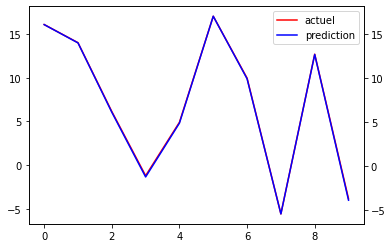

In [ ]:
actuel = [16.083333,14.005556,6.127778,-1.222222,4.894444,17.03333,9.950000,-5.600000,12.688889,-3.866667]
prediction = [16.083333,14.005556,6.127611,-1.226556,4.890667,17.033222,9.927500,-5.423889,12.688889,-3.866667]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

#predict humidity based on temperature ==>weather_df file#

In [ ]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
weather_df.shape

(96453, 12)

In [ ]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
weather_df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
weather_df.isnull().all()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

In [ ]:
weather_df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
weather_df.loc[weather_df['Precip Type'].isnull(),'Precip Type']='rain'

In [ ]:
round(100*(weather_df.isnull().sum()/len(weather_df.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

In [ ]:
weather_df.loc[weather_df['Precip Type']=='rain','Precip Type']=1
weather_df.loc[weather_df['Precip Type']=='snow','Precip Type']=0

In [ ]:
weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]

In [ ]:
weather_y = weather_df_num.pop('Humidity')
weather_x = weather_df_num

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(weather_x,weather_y,test_size = 0.2,random_state = 4)

In [ ]:
train_x.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
70626,21.061111,21.061111,12.5580,110.0,16.1000,0.0,1005.87
52457,25.016667,25.016667,18.4989,352.0,10.3523,0.0,1025.36
90690,4.422222,0.738889,17.1304,270.0,15.8263,0.0,1014.75
69528,13.772222,13.772222,14.4900,300.0,15.8263,0.0,1014.56
92419,23.288889,23.288889,6.3917,357.0,16.1000,0.0,1022.05


In [ ]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
prediction = model.predict(test_x)
np.mean((prediction-test_y)**2)

0.020089356938033893

In [ ]:
pd.DataFrame({'actuel':test_y,
              'prediction':prediction,
              'diff':(test_y-prediction)})

,actuel,prediction,diff
37443,0.92,0.916713,0.003287
86534,0.89,0.831889,0.058111
2082,0.83,0.797085,0.032915
53130,0.24,0.475429,-0.235429
45196,0.82,0.661377,0.158623
...,...,...,...
55387,0.83,0.937631,-0.107631
25976,0.87,0.798058,0.071942
32423,0.37,0.637978,-0.267978
26570,0.53,0.664748,-0.134748


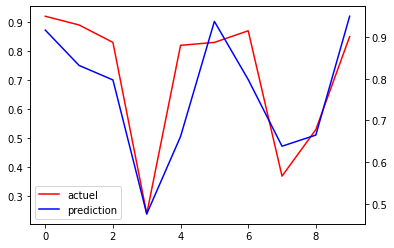

In [ ]:
actuel = [0.92,0.89,0.83,0.24,0.82,0.83,0.87,0.37,0.53,0.85]
prediction = [0.916713,0.831889,0.797085,0.475429,0.661377,0.937631,0.798058,0.637978,0.664748,0.950009]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(train_x)
poly.fit(x_poly, train_y)
lin2 = LinearRegression()
lin2.fit(x_poly, train_y)

LinearRegression()

In [ ]:
prediction2 = lin2.predict(poly.fit_transform(test_x))
np.mean((prediction2-test_y)**2)

0.012940116492472944

In [ ]:
pd.DataFrame({'actuel':test_y,
              'prediction':prediction2,
              'diff':(test_y-prediction2)})

,actuel,prediction,diff
37443,0.92,0.872063,0.047937
86534,0.89,0.849259,0.040741
2082,0.83,0.845053,-0.015053
53130,0.24,0.340253,-0.100253
45196,0.82,0.790156,0.029844
...,...,...,...
55387,0.83,0.732743,0.097257
25976,0.87,0.841752,0.028248
32423,0.37,0.644107,-0.274107
26570,0.53,0.657021,-0.127021


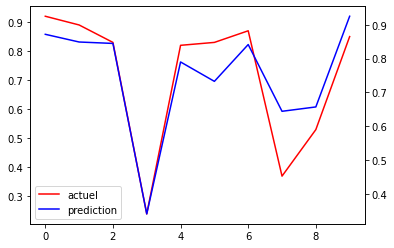

In [ ]:
actuel = [0.92,0.89,0.83,0.24,0.82,0.83,0.87,0.37,0.53,0.85]
prediction = [0.872063,0.849259,0.845053,0.340253,0.790156,0.732743,0.841752,0.644107,0.657021,0.925539]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction3 = regressor.predict(test_x)
np.mean((prediction3-test_y)**2)

0.01978048960655228

In [ ]:
pd.DataFrame({'actuel':test_y,
              'prediction':prediction3,
              'diff':(test_y-prediction3)})

,actuel,prediction,diff
37443,0.92,0.74,0.18
86534,0.89,0.57,0.32
2082,0.83,0.86,-0.03
53130,0.24,0.24,0.00
45196,0.82,0.81,0.01
...,...,...,...
55387,0.83,0.81,0.02
25976,0.87,0.96,-0.09
32423,0.37,0.72,-0.35
26570,0.53,0.79,-0.26


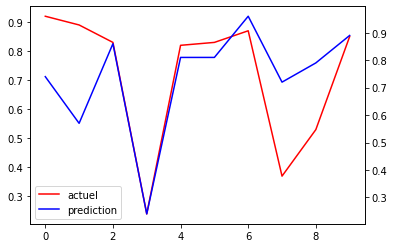

In [ ]:
actuel = [0.92,0.89,0.83,0.24,0.82,0.83,0.87,0.37,0.53,0.85]
prediction = [0.74,0.57,0.86,0.24,0.81,0.81,0.96,0.72,0.79,0.89]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
prediction4 = regr.predict(test_x)
np.mean((prediction4-test_y)**2)

0.0109176039791315

In [ ]:
pd.DataFrame({'actuel':test_y,
              'prediction':prediction4,
              'diff':(test_y-prediction4)})

,actuel,prediction,diff
37443,0.92,0.899544,0.020456
86534,0.89,0.793136,0.096864
2082,0.83,0.881626,-0.051626
53130,0.24,0.258596,-0.018596
45196,0.82,0.806116,0.013884
...,...,...,...
55387,0.83,0.831423,-0.001423
25976,0.87,0.877749,-0.007749
32423,0.37,0.633857,-0.263857
26570,0.53,0.694788,-0.164788


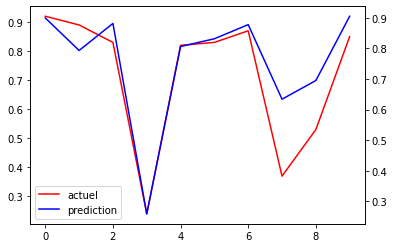

In [ ]:
actuel = [0.92,0.89,0.83,0.24,0.82,0.83,0.87,0.37,0.53,0.85]
prediction = [0.899544,0.793136,0.881626,0.258596,0.806116,0.831423,0.877749,0.633857,0.694788,0.905112]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()

In [ ]:
regr2 = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=100)
regr2.fit(train_x,train_y)

RandomForestRegressor(max_depth=50, random_state=0)

In [ ]:
prediction5 = regr2.predict(test_x)
np.mean((prediction5-test_y)**2)

0.009797428852022675

In [ ]:
pd.DataFrame({'actuel':test_y,
              'prediction':prediction5,
              'diff':(test_y-prediction5)})

,actuel,prediction,diff
37443,0.92,0.9108,0.0092
86534,0.89,0.8124,0.0776
2082,0.83,0.8390,-0.0090
53130,0.24,0.2402,-0.0002
45196,0.82,0.8189,0.0011
...,...,...,...
55387,0.83,0.8007,0.0293
25976,0.87,0.8525,0.0175
32423,0.37,0.6050,-0.2350
26570,0.53,0.6086,-0.0786


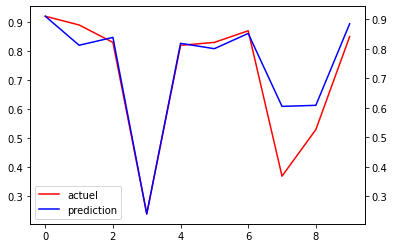

In [ ]:
actuel = [0.92,0.89,0.83,0.24,0.82,0.83,0.87,0.37,0.53,0.85]
prediction = [0.9108,0.8124,0.8390,0.2402,0.8189,0.8007,0.8525,0.6050,0.6086,0.8852]
ax1 = plt.subplot()
l1, = ax1.plot(actuel, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(prediction, color='blue')
plt.legend([l1, l2], ["actuel", "prediction"])
plt.show()